Mounted at /content/drive
Всего изображений собак: 12501
Всего изображений кошек: 12501
/content/drive/My Drive/labsfile/PetImages/Dog
/content/drive/My Drive/labsfile/PetImages/Cat
/content/drive/My Drive/labsfile/PetImages/training
/content/drive/My Drive/labsfile/PetImages/validation
/content/drive/My Drive/labsfile/PetImages/training/cats
/content/drive/My Drive/labsfile/PetImages/training/dogs
/content/drive/My Drive/labsfile/PetImages/validation/cats
/content/drive/My Drive/labsfile/PetImages/validation/dogs
666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Всего изображений кошек: 12501
Всего изображений собак: 12501

Изображений кошек для обучения: 11250
Изображений собак для обучения: 11250
Изображений кошек для валидации: 1250
Изображений собак для валидации: 1250
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Epoch 1/15
163/225 [====================>.........] - ETA: 4:32 - loss: 0.6778 - accuracy: 0.5987

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


225/225 [==============================] - 914s 4s/step - loss: 0.6481 - accuracy: 0.6264 - val_loss: 0.5495 - val_accuracy: 0.7284
Epoch 2/15
225/225 [==============================] - 662s 3s/step - loss: 0.5239 - accuracy: 0.7366 - val_loss: 0.4750 - val_accuracy: 0.7696
Epoch 3/15
225/225 [==============================] - 663s 3s/step - loss: 0.4574 - accuracy: 0.7841 - val_loss: 0.4544 - val_accuracy: 0.7912
Epoch 4/15
225/225 [==============================] - 651s 3s/step - loss: 0.4057 - accuracy: 0.8155 - val_loss: 0.4127 - val_accuracy: 0.8088
Epoch 5/15
225/225 [==============================] - 665s 3s/step - loss: 0.3588 - accuracy: 0.8407 - val_loss: 0.3989 - val_accuracy: 0.8112
Epoch 6/15
225/225 [==============================] - 643s 3s/step - loss: 0.3126 - accuracy: 0.8621 - val_loss: 0.4279 - val_accuracy: 0.7992
Epoch 7/15
225/225 [==============================] - 622s 3s/step - loss: 0.2479 - accuracy: 0.8959 - val_loss: 0.5029 - val_accuracy: 0.7936
Epoch 8/15

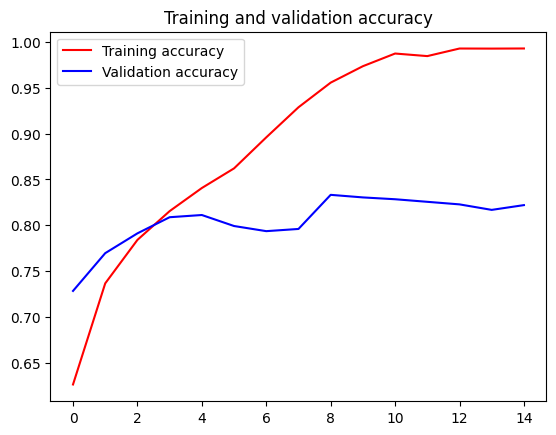

<Figure size 640x480 with 0 Axes>

In [1]:
# Импорт необходимых библиотек
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from google.colab import drive


# Определение путей к изображениям
drive.mount('/content/drive')
source_path = '/content/drive/My Drive/labsfile/PetImages'
source_path_dogs = '/content/drive/My Drive/labsfile/PetImages/Dog'
source_path_cats = '/content/drive/My Drive/labsfile/PetImages/Cat'
# Вывод количества изображений
print(f"Всего изображений собак: {len(os.listdir(source_path_dogs))}")
print(f"Всего изображений кошек: {len(os.listdir(source_path_cats))}")


# Функция для создания каталогов для обучающего и тестового наборов
def create_train_val_dirs(root_path):
    training_cats_dir = os.path.join(root_path, 'training', 'cats')
    training_dogs_dir = os.path.join(root_path, 'training', 'dogs')
    validation_cats_dir = os.path.join(root_path, 'validation', 'cats')
    validation_dogs_dir = os.path.join(root_path, 'validation', 'dogs')

    # Проверяем существование каталогов перед их созданием
    if not os.path.exists(training_cats_dir):
        os.makedirs(training_cats_dir, mode=0o755)
    if not os.path.exists(training_dogs_dir):
        os.makedirs(training_dogs_dir, mode=0o755)
    if not os.path.exists(validation_cats_dir):
        os.makedirs(validation_cats_dir, mode=0o755)
    if not os.path.exists(validation_dogs_dir):
        os.makedirs(validation_dogs_dir, mode=0o755)

root_dir = '/content/drive/My Drive/labsfile/PetImages'
create_train_val_dirs(root_dir)

# Тестирование функции create_train_val_dirs
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

# Функция для разделения данных на обучающий и тестовый наборы
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[training_length:]

  for filename in training_set:
    this_file = SOURCE_DIR + filename
    destination = TRAINING_DIR + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE_DIR + filename
    destination = VALIDATION_DIR + filename
    copyfile(this_file, destination)


# Определение путей
CAT_SOURCE_DIR = "/content/drive/My Drive/labsfile/PetImages/Cat/"
DOG_SOURCE_DIR = "/content/drive/My Drive/labsfile/PetImages/Dog/"

TRAINING_DIR = "/content/drive/My Drive/labsfile/PetImages/training/"
VALIDATION_DIR = "/content/drive/My Drive/labsfile/PetImages/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Очистка каталогов в случае, если вы запускаете эту ячейку несколько раз
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Определение доли изображений, используемых для обучения
split_size = .9

# Запуск функции
# ПРИМЕЧАНИЕ: Должны быть напечатаны сообщения о нулевой длине изображений
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Проверка, что количество изображений соответствует ожидаемому результату
print(f"\n\nВсего изображений кошек: {len(os.listdir(CAT_SOURCE_DIR))}")
print(f"Всего изображений собак: {len(os.listdir(DOG_SOURCE_DIR))}\n")

# Обучающие и валидационные наборы
print(f"Изображений кошек для обучения: {len(os.listdir(TRAINING_CATS_DIR))}")
print(f"Изображений собак для обучения: {len(os.listdir(TRAINING_DOGS_DIR))}")
print(f"Изображений кошек для валидации: {len(os.listdir(VALIDATION_CATS_DIR))}")
print(f"Изображений собак для валидации: {len(os.listdir(VALIDATION_DOGS_DIR))}")

# Функция для создания генераторов обучающих и валидационных данных
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

 # Создание экземпляра класса ImageDataGenerator (не забудьте установить аргумент rescale)
  train_datagen = ImageDataGenerator(rescale=1.0/255)

  # Передача соответствующих аргументов в метод flow_from_directory
  train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Создание экземпляра класса ImageDataGenerator (не забудьте установить аргумент rescale)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Передача соответствующих аргументов в метод flow_from_directory
  validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

# Тестирование генераторов
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

# Функция для создания модели
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Получение необученной модели
model = create_model()

# Обучение модели
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

# Визуализация результатов обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()